<a href="https://colab.research.google.com/github/karthikhub19/Projects/blob/main/E_Commerce_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer segmentation is the method of distributing a customer base into collections of people based on mutual characteristics so organizations can market to group efficiently and competently individually.

The purpose of segmenting customers is to determine how to correlate to customers in multiple segments to maximize customer benefits. Perfectly done customer segmentation empowers marketers to interact with every customer in the best efficient approach

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/E-commerce Segmentation.csv',encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
new_df=df[['Description']]
new_df

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


In [ ]:
new_df.isnull().sum()

Description    1454
dtype: int64

In [ ]:
new_df.dropna(inplace=True)
new_df

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


In [ ]:
#Lower casing

new_df['Description']=new_df['Description'].str.lower()
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Description
0,white hanging heart t-light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart.


In [ ]:
#Removing WhiteSpaces
def remove_whitespace(text):
    return  " ".join(text.split())

new_df['Description']=new_df['Description'].apply(remove_whitespace)
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Description
0,white hanging heart t-light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart.


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Tokenize

from nltk import word_tokenize

Des=new_df['Description'].apply(lambda X:word_tokenize(X))
new_df['Des']=Des
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Description,Des
0,white hanging heart t-light holder,"[white, hanging, heart, t-light, holder]"
1,white metal lantern,"[white, metal, lantern]"
2,cream cupid hearts coat hanger,"[cream, cupid, hearts, coat, hanger]"
3,knitted union flag hot water bottle,"[knitted, union, flag, hot, water, bottle]"
4,red woolly hottie white heart.,"[red, woolly, hottie, white, heart, .]"
...,...,...
541904,pack of 20 spaceboy napkins,"[pack, of, 20, spaceboy, napkins]"
541905,children's apron dolly girl,"[children, 's, apron, dolly, girl]"
541906,childrens cutlery dolly girl,"[childrens, cutlery, dolly, girl]"
541907,childrens cutlery circus parade,"[childrens, cutlery, circus, parade]"


In [ ]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 5.3 MB/s 


In [ ]:
#Spell Check
from spellchecker import SpellChecker
def spell_check(text):
    
    result = []
    spell = SpellChecker()
    for word in text:
        correct_word = spell.correction(word)
        result.append(correct_word)
    
    return result

#taking too much time 

In [ ]:
#Stop Words removing

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result

In [ ]:
new_df['Des']=new_df['Des'].apply(remove_stopwords)
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Description,Des
0,white hanging heart t-light holder,"[white, hanging, heart, t-light, holder]"
1,white metal lantern,"[white, metal, lantern]"
2,cream cupid hearts coat hanger,"[cream, cupid, hearts, coat, hanger]"
3,knitted union flag hot water bottle,"[knitted, union, flag, hot, water, bottle]"
4,red woolly hottie white heart.,"[red, woolly, hottie, white, heart, .]"


In [ ]:
#Removing Punctuations

from nltk.tokenize import RegexpTokenizer

def remove_punct(text):
    
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

In [ ]:
new_df['Des']=new_df['Des'].apply(remove_punct)
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Description,Des
0,white hanging heart t-light holder,"[white, hanging, heart, t, light, holder]"
1,white metal lantern,"[white, metal, lantern]"
2,cream cupid hearts coat hanger,"[cream, cupid, hearts, coat, hanger]"
3,knitted union flag hot water bottle,"[knitted, union, flag, hot, water, bottle]"
4,red woolly hottie white heart.,"[red, woolly, hottie, white, heart]"


In [ ]:
#Removing Frequent Words

from nltk import FreqDist

def frequent_words(df):
    
    lst=[]
    for text in df.values:
        lst+=text[0]
    fdist=FreqDist(lst)
    return fdist.most_common(10)
frequent_words(new_df)

[(' ', 1828451),
 ('e', 1289796),
 ('a', 1095610),
 ('t', 957331),
 ('r', 918668),
 ('o', 865808),
 ('i', 788465),
 ('s', 778088),
 ('n', 717627),
 ('l', 705998)]

In [ ]:
freq_words = frequent_words(new_df)

lst = []
for a,b in freq_words:
    lst.append(b)

def remove_freq_words(text):
    
    result=[]
    for item in text:
        if item not in lst:
            result.append(item)
    
    return result

In [ ]:
new_df['Des']=new_df['Des'].apply(remove_freq_words)
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Description,Des
0,white hanging heart t-light holder,"[white, hanging, heart, t, light, holder]"
1,white metal lantern,"[white, metal, lantern]"
2,cream cupid hearts coat hanger,"[cream, cupid, hearts, coat, hanger]"
3,knitted union flag hot water bottle,"[knitted, union, flag, hot, water, bottle]"
4,red woolly hottie white heart.,"[red, woolly, hottie, white, heart]"


In [ ]:
#lemma

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def lemmatization(text):
    
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
    
    return result

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
new_df['Des']=new_df['Des'].apply(lemmatization)
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Description,Des
0,white hanging heart t-light holder,"[white, hang, heart, t, light, holder]"
1,white metal lantern,"[white, metal, lantern]"
2,cream cupid hearts coat hanger,"[cream, cupid, heart, coat, hanger]"
3,knitted union flag hot water bottle,"[knit, union, flag, hot, water, bottle]"
4,red woolly hottie white heart.,"[red, woolly, hottie, white, heart]"


In [ ]:
#stemming

from nltk.stem import PorterStemmer

def stemming(text):
    porter = PorterStemmer()
    
    result=[]
    for word in text:
        result.append(porter.stem(word))
    return result

In [ ]:
new_df['Des']=new_df['Des'].apply(stemming)
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Description,Des
0,white hanging heart t-light holder,"[white, hang, heart, t, light, holder]"
1,white metal lantern,"[white, metal, lantern]"
2,cream cupid hearts coat hanger,"[cream, cupid, heart, coat, hanger]"
3,knitted union flag hot water bottle,"[knit, union, flag, hot, water, bottl]"
4,red woolly hottie white heart.,"[red, woolli, hotti, white, heart]"


In [ ]:
import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [ ]:
#TFIDF
x=new_df['Description']
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(x)

In [ ]:
#Deciding K value

inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

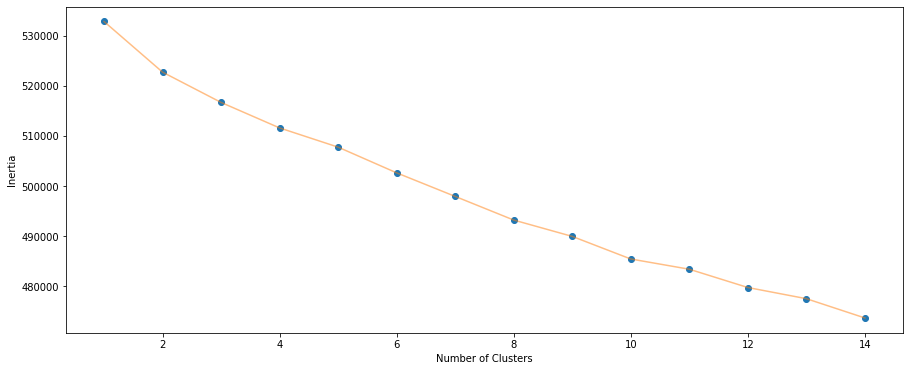

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
true_k=14
algorithm = (KMeans(n_clusters = 14 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
order_centroids = algorithm.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [ ]:
for i in range(true_k):
  print('Cluster %d:' % i),
  for ind in order_centroids[i, :20]:
    print('%s' % terms[ind])

Cluster 0:
box
design
card
home
doormat
regency
clock
tin
feltcraft
frame
red
wooden
blue
green
white
rose
spaceboy
birthday
cream
wall
Cluster 1:
set
tins
pantry
paper
design
tea
baking
cake
jam
making
wooden
cutters
lights
cookie
doilies
retrospot
12
boxes
piece
snack
Cluster 2:
ceramic
bunting
drawer
mug
party
knob
postage
travel
edwardian
kitchen
wallet
card
scales
colour
assorted
key
white
tube
bird
red
Cluster 3:
sign
metal
french
blue
door
chocolate
person
bathroom
cook
wine
baths
diet
toilet
singing
gin
hand
tonic
confusing
lantern
hook
Cluster 4:
jumbo
bag
strawberry
vintage
storage
paisley
charlotte
woodland
apples
suki
alphabet
doily
leaf
baroque
toys
christmas
animals
owls
design
scandinavian
Cluster 5:
vintage
paisley
tin
red
doily
bag
shopper
snap
jack
set
union
spot
cards
card
airline
leaf
beaker
cream
jumbo
travel
Cluster 6:
light
holder
hanging
heart
glass
popcorn
white
night
zinc
silver
colour
victorian
jar
rabbit
red
antique
card
star
toadstool
led
Cluster 7:
retrosp

In [ ]:
print('\n')
print('Prediction')
X = vectorizer.transform(['WHITE HANGING HEART T-LIGHT HOLDER'])
predicted =algorithm.predict(X)
print(predicted)



Prediction
[6]
